In [155]:
import skimage as sk
from scipy.ndimage import gaussian_filter
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from copy import copy
import napari

In [319]:
image = sk.io.imread('./../domes/Dome103_processed.tif')
prediction_image = sk.io.imread('./../domes/Dome103_processed_n2v2d.tif')

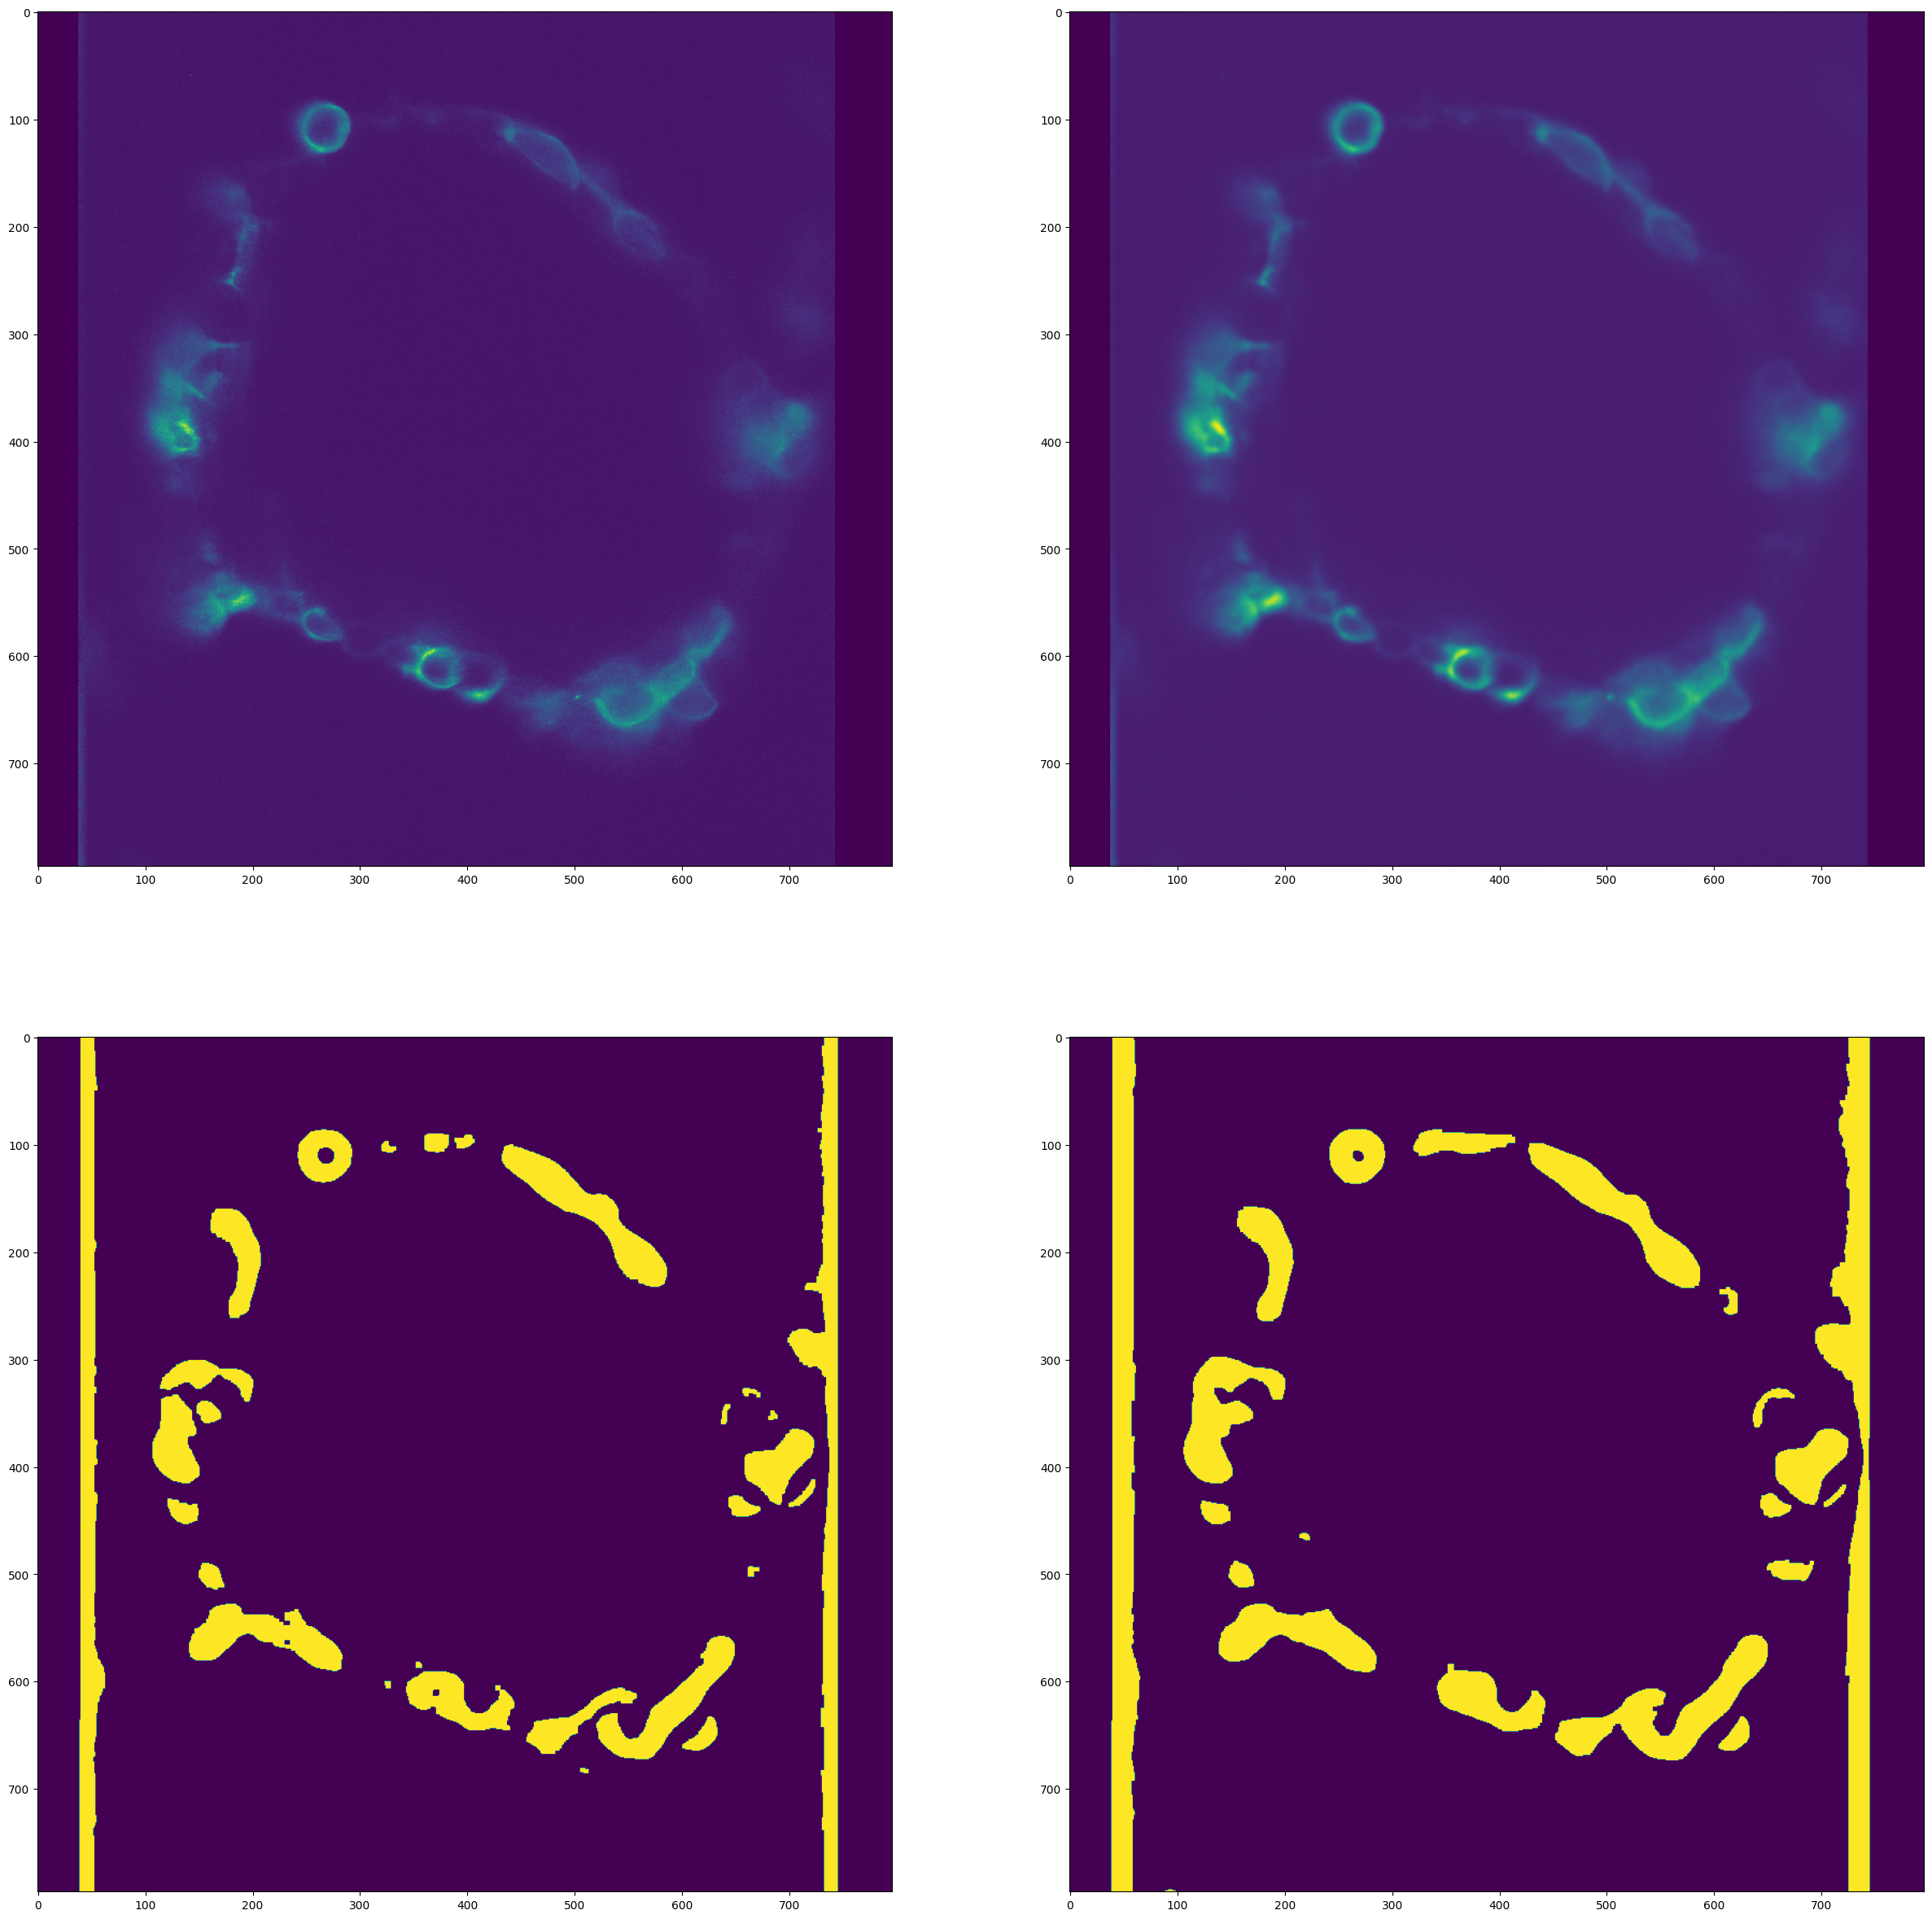

In [87]:
z_pos = 200

im = image[z_pos]
pred_im = prediction_image[z_pos]


kernel = np.ones((4,4), np.uint8)

im = im.astype(np.uint8)
gaussian_im = gaussian_filter(im, sigma=1)
median_im = sk.filters.rank.median(gaussian_im, sk.morphology.star(12))
th3_im = cv.adaptiveThreshold(median_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 55, -1) # Needs uint8 to make the asaptive threshold mask
th3_im = cv.morphologyEx(th3_im, cv.MORPH_OPEN, kernel=kernel)
th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)

pred_im = pred_im.astype(np.uint8)
gaussian_pred_im = gaussian_filter(pred_im, sigma=1) 
median_pred_im = sk.filters.rank.median(gaussian_pred_im, sk.morphology.star(12))
th3_pred_im = cv.adaptiveThreshold(median_pred_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 85, -1) # Needs uint8 to make the asaptive threshold mask
th3_pred_im = cv.morphologyEx(th3_pred_im, cv.MORPH_OPEN, kernel=kernel)
th3_pred_im = cv.morphologyEx(th3_pred_im, cv.MORPH_CLOSE, kernel=kernel)

# _, th3_pred_im = cv.threshold(median_pred_im, 0, 255, cv.THRESH_BINARY+cv.THRESH_OTSU)

plt.figure(figsize=(30,30))
plt.subplot(2,2,1)
plt.imshow(image[z_pos])
plt.subplot(2,2,2)
plt.imshow(prediction_image[z_pos])
plt.subplot(2,2,3)
plt.imshow(th3_im)
plt.subplot(2,2,4)
plt.imshow(th3_pred_im)


error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'morphologyEx'
> Overload resolution failed:
>  - src data type = 0 is not supported
>  - Expected Ptr<cv::UMat> for argument 'src'


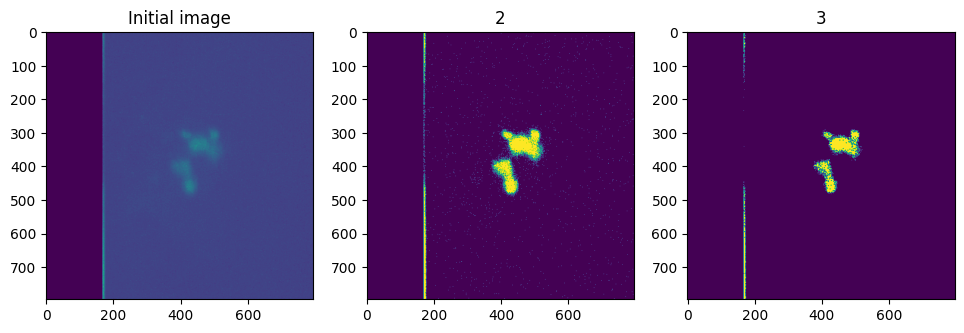

In [248]:
image = sk.io.imread('./../domes/Dome103_processed.tif')
z_pos = 70
im = copy(image[z_pos])

non_zero_cols = np.any(im != 0, axis = 0)
first_non_zero_col = np.argmax(non_zero_cols)
last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
clean_image = im[:, first_non_zero_col:last_non_zero_col + 1]

plt.figure(figsize=(20,20))
plt.subplot(2,5,1)
plt.imshow(im)
plt.title('Initial image')

# print(np.mean(clean_image))
# im[im < np.mean(clean_image)] = 0
# im[im > np.mean(clean_image)] = 255
# print(np.mean(im))

th = sk.filters.threshold_otsu(clean_image)
im = im > th

im[im == False] = 0
im[im == True] = 1

plt.subplot(2,5,2)
plt.imshow(im)
plt.title('2')


#th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)
# th3_im = cv.morphologyEx(im, cv.MORPH_OPEN, kernel=kernel)
kernel = np.ones((2,2), np.uint8)
th3_im = sk.morphology.erosion(im, kernel)


# th3_im = sk.morphology.area_closing(th3_im, 2)

plt.subplot(2,5,3)
plt.imshow(th3_im)
plt.title('3')



kernel = np.ones((4,4), np.uint8)
th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel) # Closes holes

plt.subplot(2,5,4)
plt.imshow(th3_im)
plt.title('4')

kernel = np.ones((4,4), np.uint8)
th3_im = cv.morphologyEx(th3_im, cv.MORPH_OPEN, kernel=kernel)

plt.subplot(2,5,5)
plt.imshow(th3_im)
plt.title('5')



kernel = np.ones((4,4), np.uint8)

gaussian_im = gaussian_filter(th3_im, sigma=1)
median_im = sk.filters.rank.median(gaussian_im, sk.morphology.star(12))
# th3_im = cv.adaptiveThreshold(median_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 55, -1) # Needs uint8 to make the asaptive threshold mask
th3_im = cv.morphologyEx(median_im, cv.MORPH_OPEN, kernel=kernel)
th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)
# th3_im = th3_im.astype(np.uint8)
# th2 = cv.adaptiveThreshold(th3_im,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,55,2)

plt.subplot(2,2,3)
plt.imshow(th3_im)
plt.title('Final')





Original image mean:     26.885517
After adjust image mean: 0.5116238
Minimum pixel value: 0.0 Maximum pixel value: 1.0


C:\Users\SPIM\AppData\Local\Temp\ipykernel_21928\146599210.py:63: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask_single_img(im)


Original image mean:     31.421406
After adjust image mean: 0.34652415
Minimum pixel value: 0.0 Maximum pixel value: 1.0


C:\Users\SPIM\AppData\Local\Temp\ipykernel_21928\146599210.py:65: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask_single_img(im)


Original image mean:     34.94264
After adjust image mean: 0.2874302
Minimum pixel value: 0.0 Maximum pixel value: 1.0


C:\Users\SPIM\AppData\Local\Temp\ipykernel_21928\146599210.py:67: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask_single_img(im)


Original image mean:     49.58416
After adjust image mean: 0.31703982
Minimum pixel value: 0.0 Maximum pixel value: 1.0


C:\Users\SPIM\AppData\Local\Temp\ipykernel_21928\146599210.py:69: UserWarning: Possible precision loss converting image of type float32 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  mask_single_img(im)


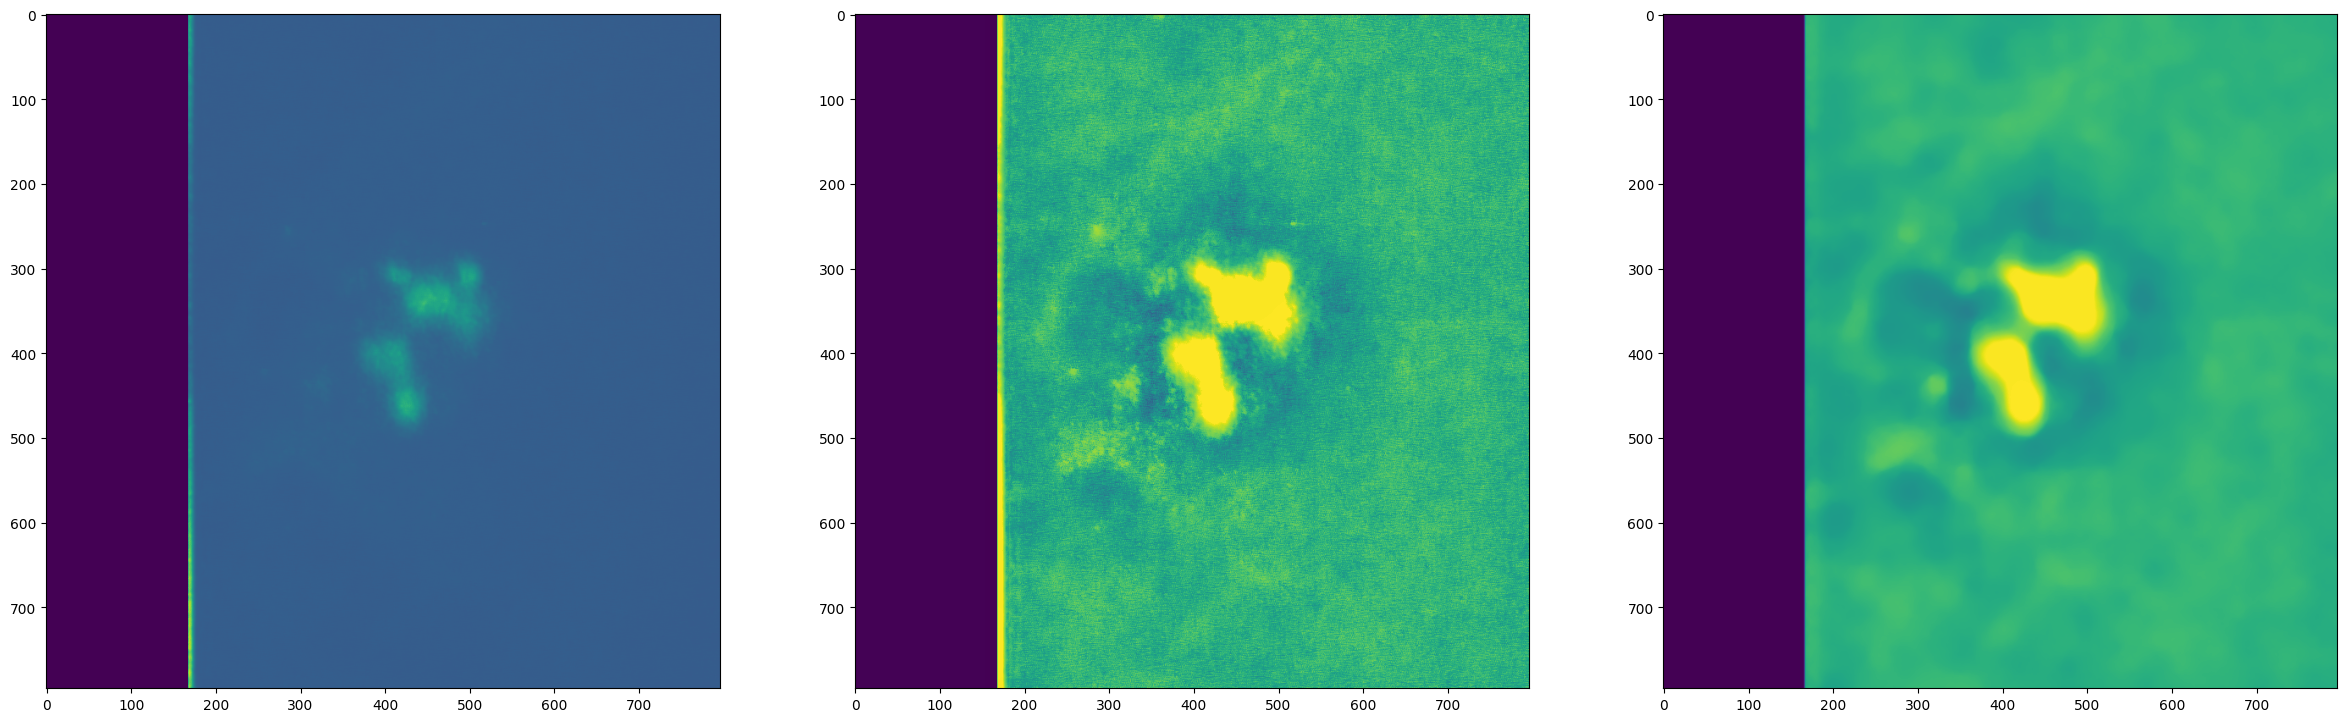

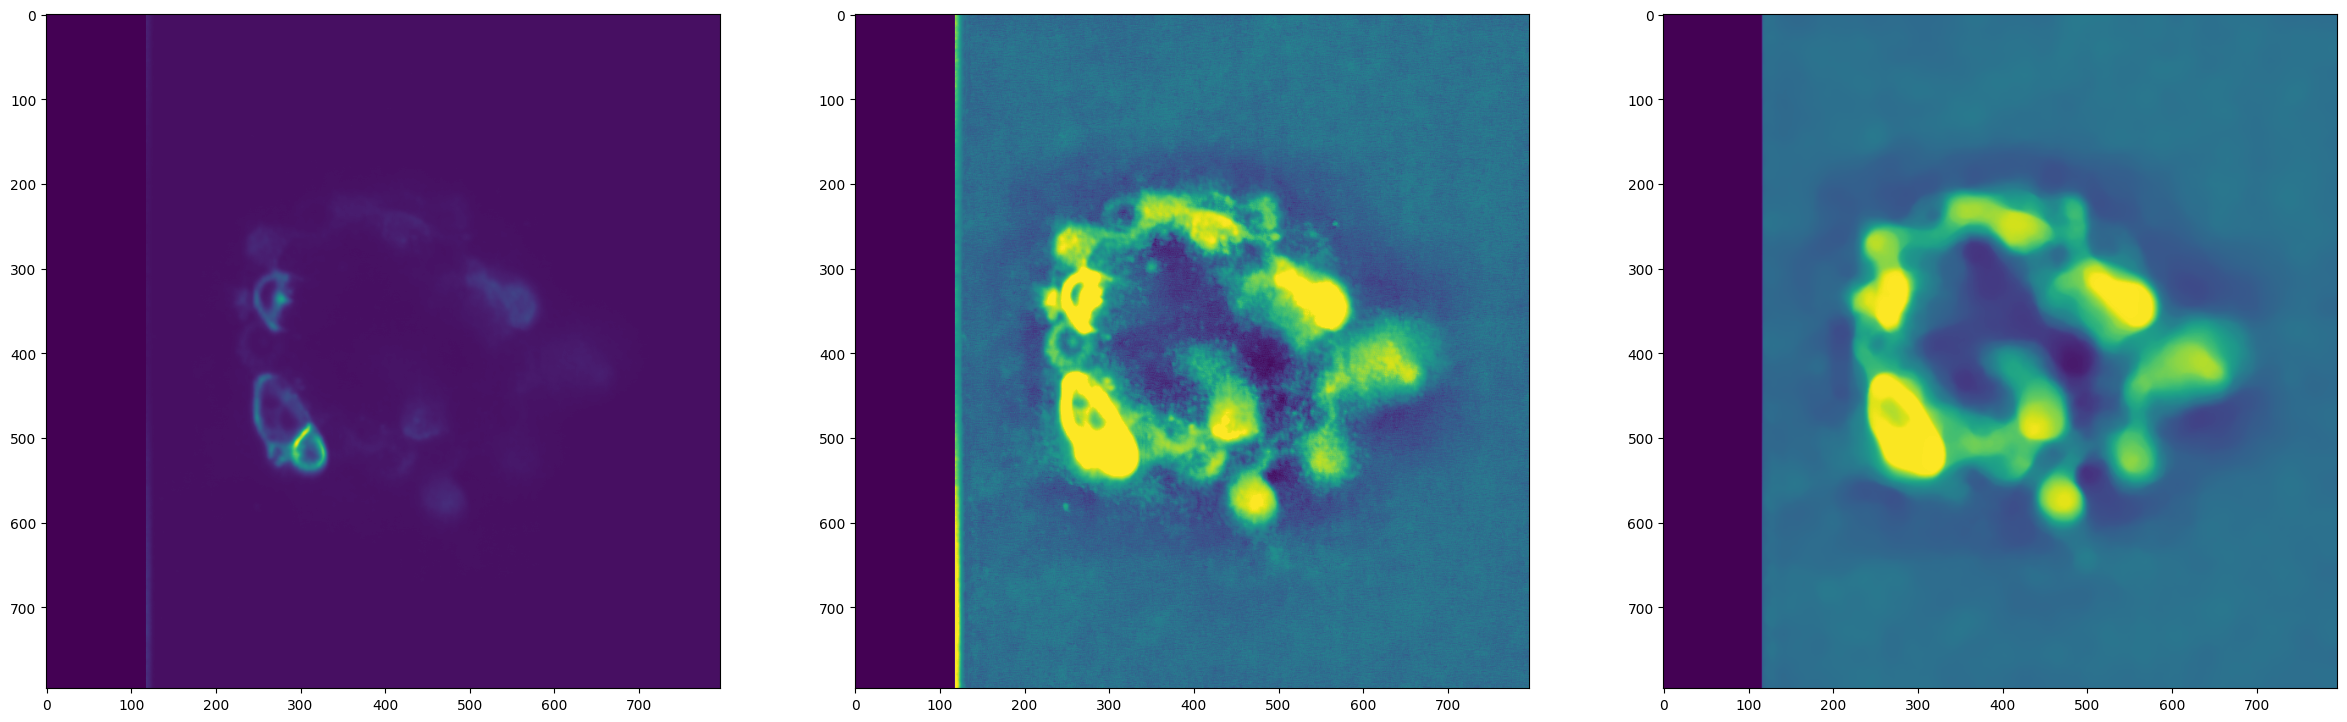

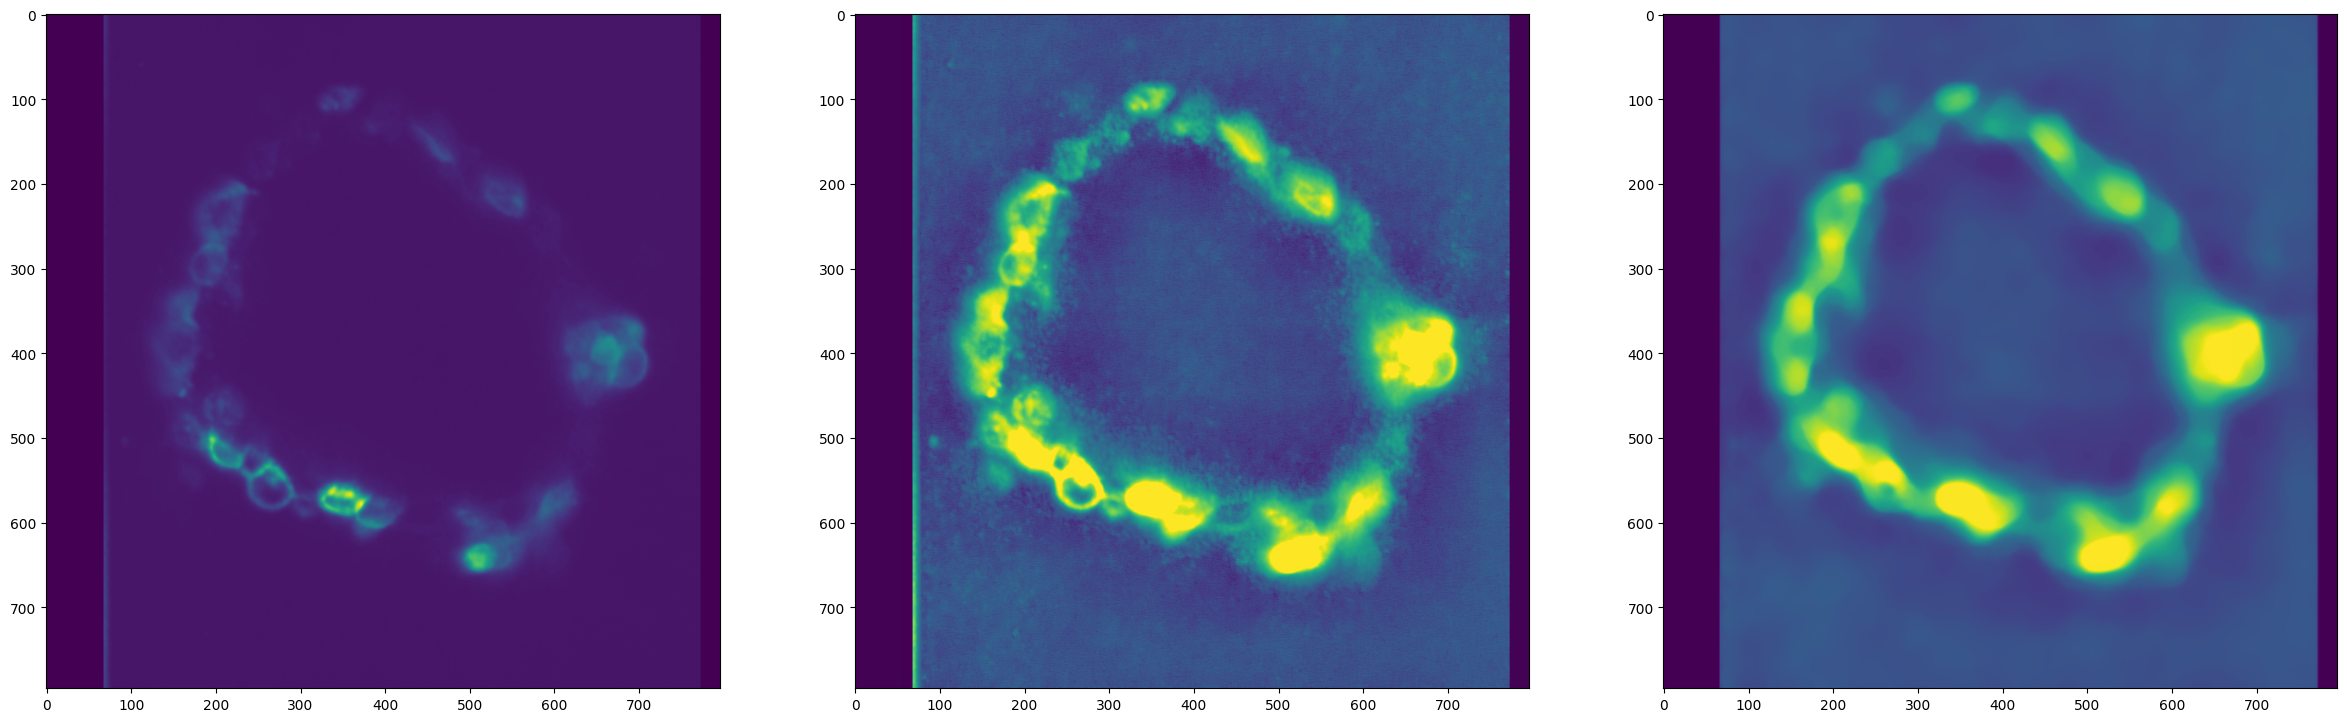

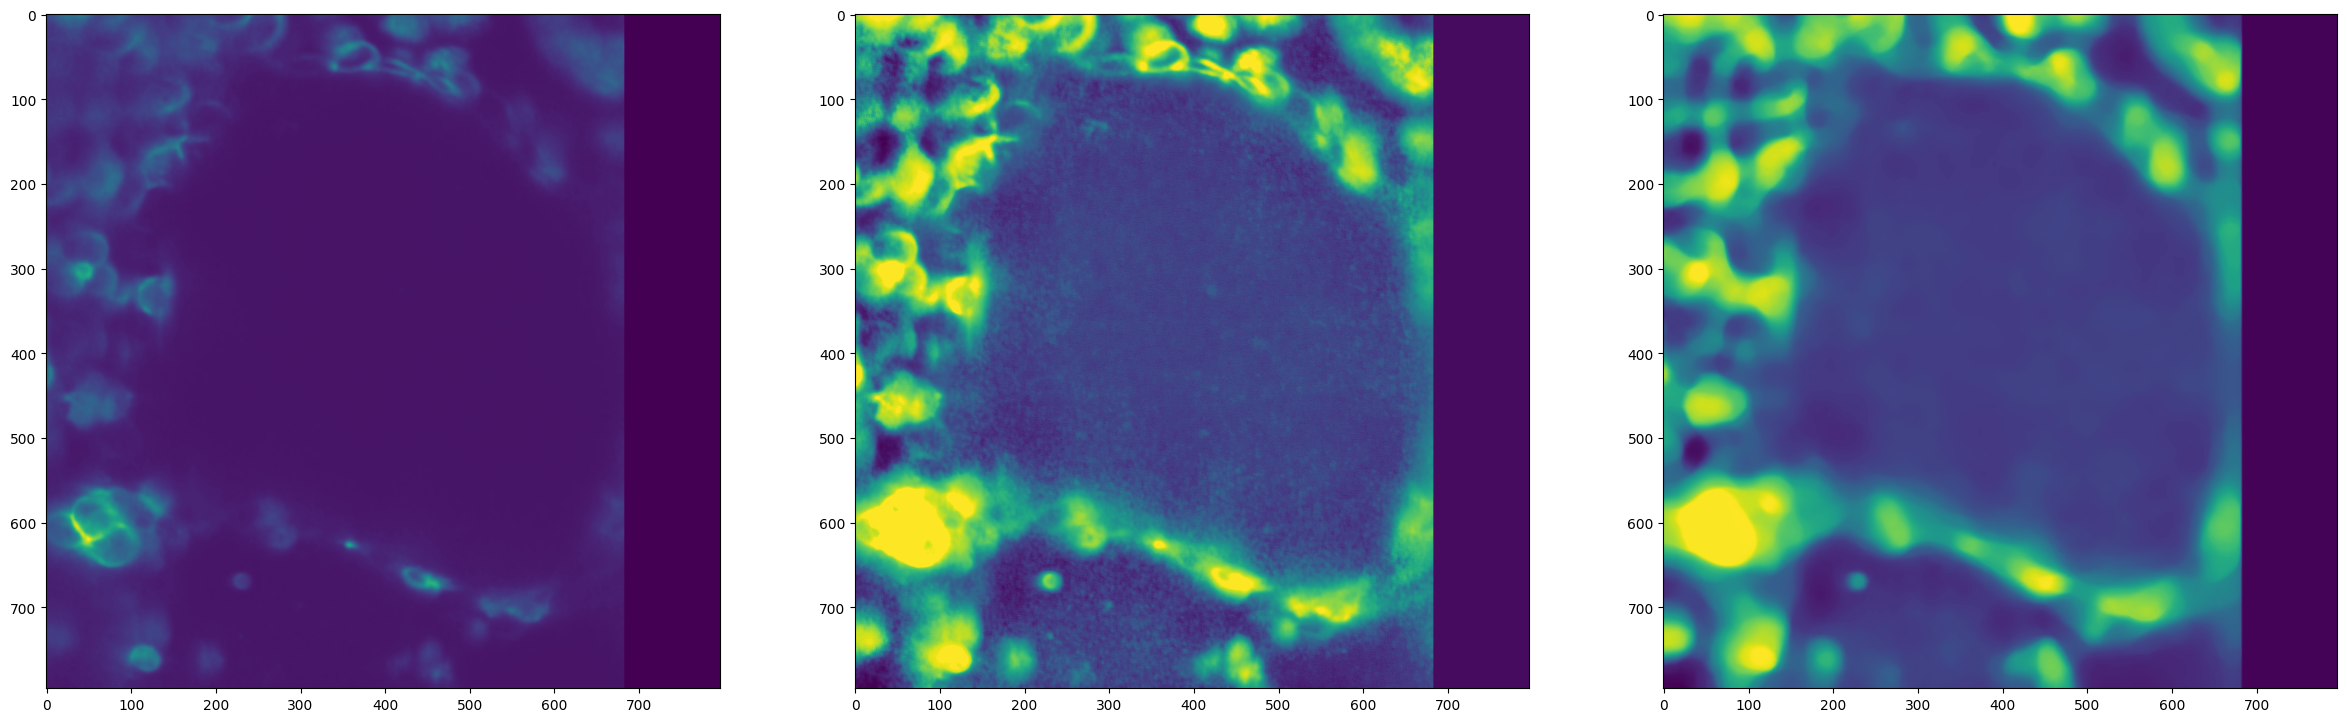

In [317]:
def clean_image(im):
    non_zero_cols = np.any(im != 0, axis = 0)
    first_non_zero_col = np.argmax(non_zero_cols)
    last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
    clean_image = im[:, first_non_zero_col:last_non_zero_col + 1]
    return (clean_image)
    
def compute_mean_no_zeros(im):
    '''
    Compute the mean pixel intensity of the image.
    '''
    return np.mean(clean_image(im))
    

def mask_single_img(im, sub_cols = 4):
    '''
    Make a mask of the image. Combine different steps.
    '''
    
    print('Original image mean:    ', compute_mean_no_zeros(im))
    
    plt.figure(figsize=(40,20))
    plt.subplot(1,sub_cols,1)
    plt.imshow(im)
    
    # Contrast stretching
    p2, p98 = np.percentile(im, (2, 98))
    im = sk.exposure.rescale_intensity(im, in_range=(p2, p98))
    
    im = sk.exposure.equalize_adapthist(im, clip_limit=0.03)
    
    mean_no_zeros = compute_mean_no_zeros(im)
    print('After adjust image mean:', mean_no_zeros)
    
    
    # im[im < mean_no_zeros] = 0
    # im[im > mean_no_zeros] = 255
    
    plt.subplot(1,sub_cols,2)
    plt.imshow(im)
    
    # im = sk.filters.unsharp_mask(im, radius=2, amount=10)
    print('Minimum pixel value:', im.min(), 'Maximum pixel value:', im.max())
    
    # im = im.astype(np.uint8)
   
    im = gaussian_filter(im, sigma=1)
    im = sk.filters.rank.median(im, sk.morphology.star(12))
    
   
    plt.subplot(1,sub_cols,3)
    plt.imshow(im)
    
    






image = sk.io.imread('./../domes/Dome103_processed_n2v2d.tif')
z_pos = 70
im = copy(image[70])
mask_single_img(im)
im = copy(image[120])
mask_single_img(im)
im = copy(image[170])
mask_single_img(im)
im = copy(image[260])
mask_single_img(im)

In [224]:
# mask 1

image = sk.io.imread('./../domes/Dome103_processed.tif')
mask = []
for im in image:
    
    non_zero_cols = np.any(im != 0, axis = 0)
    first_non_zero_col = np.argmax(non_zero_cols)
    last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
    clean_image = im[:, first_non_zero_col:last_non_zero_col + 1]
    
    im[im < np.mean(clean_image)] = 0
    im[im > np.mean(clean_image)] = 255
    
    kernel = np.ones((4,4), np.uint8)

    th3_im = cv.morphologyEx(im, cv.MORPH_OPEN, kernel=kernel)
    th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)

    gaussian_im = gaussian_filter(th3_im, sigma=1)
    median_im = sk.filters.rank.median(gaussian_im, sk.morphology.star(12))
    # th3_im = cv.adaptiveThreshold(median_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 55, -1) # Needs uint8 to make the asaptive threshold mask
    th3_im = cv.morphologyEx(median_im, cv.MORPH_OPEN, kernel=kernel)
    th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)
    th3_im = th3_im.astype(np.uint8)
    # th2 = cv.adaptiveThreshold(th3_im,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,55,2)
    
    mask.append(th3_im)
    
mask = np.array(mask)

In [323]:
# mask 2

image = sk.io.imread('./../domes/Dome103_processed_n2v2d.tif')
mask2 = []
for im in image:
    
    im = im.astype(np.uint16)
    
    non_zero_cols = np.any(im != 0, axis = 0)
    first_non_zero_col = np.argmax(non_zero_cols)
    last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
    clean_image = im[:, first_non_zero_col:last_non_zero_col + 1]
    
    im[im < np.mean(clean_image)] = 0
    im[im > np.mean(clean_image)] = 255
    
    kernel = np.ones((4,4), np.uint8)

    th3_im = cv.morphologyEx(im, cv.MORPH_OPEN, kernel=kernel)
    th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)

    gaussian_im = gaussian_filter(th3_im, sigma=1)
    median_im = sk.filters.rank.median(gaussian_im, sk.morphology.star(12))
    # th3_im = cv.adaptiveThreshold(median_im, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 55, -1) # Needs uint8 to make the asaptive threshold mask
    th3_im = cv.morphologyEx(median_im, cv.MORPH_OPEN, kernel=kernel)
    th3_im = cv.morphologyEx(th3_im, cv.MORPH_CLOSE, kernel=kernel)
    th3_im = th3_im.astype(np.uint8)
    # th2 = cv.adaptiveThreshold(th3_im,255,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,55,2)
    
    mask2.append(th3_im)
    
mask2 = np.array(mask2)

In [324]:
viewer = napari.Viewer()

viewer.add_image(image)
viewer.add_image(prediction_image)
viewer.add_image(mask)
viewer.add_image(mask2)

<Image layer 'mask2' at 0x254def2a290>

In [325]:
import tifffile as tiff
tiff.imsave('Dome103_denoised_mask.tif', mask2)

C:\Users\SPIM\AppData\Local\Temp\ipykernel_21928\2956772869.py:2: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tiff.imsave('Dome103_denoised_mask.tif', mask2)
